In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.5541 - accuracy: 0.5117 - val_loss: 1.6938 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.3939 - accuracy: 0.7073 - val_loss: 1.2831 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0451 - accuracy: 0.7764 - val_loss: 1.1255 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8261 - accuracy: 0.8242 - val_loss: 1.0405 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6570 - accuracy: 0.8612 - val_loss: 0.9690 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5219 - accuracy: 0.8936 - val_loss: 0.9300 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4174 - accuracy: 0.9119 - val_loss: 0.9252 - val_accuracy: 0.8030
Epoch 8/20
16

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

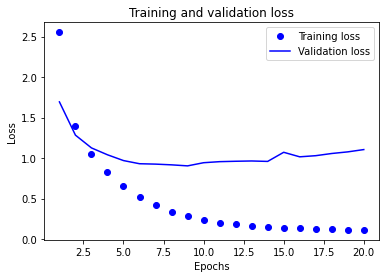

In [10]:
import matplotlib.pyplot as plt
  
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

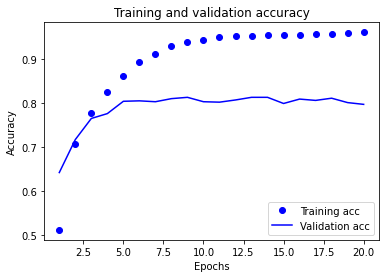

In [15]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 59ms/step - loss: 2.6785 - accuracy: 0.4827 - val_loss: 1.7758 - val_accuracy: 0.6280
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.4588 - accuracy: 0.6916 - val_loss: 1.3248 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 1.0686 - accuracy: 0.7740 - val_loss: 1.1505 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8375 - accuracy: 0.8227 - val_loss: 1.0387 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6650 - accuracy: 0.8629 - val_loss: 0.9705 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 50ms/step - loss: 0.5329 - accuracy: 0.8918 - val_loss: 0.9139 - val_accuracy: 0.8200
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4242 - accuracy: 0.9137 - val_loss: 0.9141 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [17]:
results

[0.9897290468215942, 0.790739119052887]

In [18]:
predictions = model.predict(x_test)
